# Admission Chance Prediction using Logistic Regression

This notebook documents the process followed by **Aki Sri Harsha** to build a Logistic Regression model for predicting the chance of admission based on various factors.

## Steps Performed:

1.  **Data Upload:** The dataset `Admission_Predict.csv` was uploaded to the Colab environment.
2.  **Data Loading and Initial Exploration:** The data was loaded into a pandas DataFrame. Initial exploration was performed by displaying the head, information, and descriptive statistics of the DataFrame.
3.  **Missing Value Check:** The number of missing values in each column was checked, confirming there were no missing values.
4.  **Target Variable Creation:** A binary target variable 'Admit' was created based on a threshold of 0.75 on the 'Chance of Admit' column, and the original 'Chance of Admit' column was removed.
5.  **Column Removal:** The 'Serial No.' column was removed as it was deemed irrelevant for the prediction task.
6.  **Feature Scaling:** The numerical features were scaled using `StandardScaler` to standardize their range.
7.  **Train-Test Split:** The scaled data was split into training and testing sets (80% training, 20% testing) to evaluate the model's performance on unseen data.
8.  **Model Training:** A Logistic Regression model was initialized and trained using the training data.
9.  **Prediction:** The trained model was used to make predictions on the test set.
10. **Model Evaluation:** The performance of the model was evaluated using accuracy, precision, recall, F1-score, and a confusion matrix.

## Model Performance Summary:

The Logistic Regression model achieved the following performance metrics on the test set:

*   **Accuracy:** {{accuracy:0.91}}
*   **Precision:** {{precision:0.86}}
*   **Recall:** {{recall:0.93}}
*   **F1-Score:** {{f1:0.89}}

The Confusion Matrix provides a breakdown of true positive, true negative, false positive, and false negative predictions.

This analysis provides a foundational model for predicting the chance of admission. Further steps could involve hyperparameter tuning, trying different models, or interpreting the model's coefficients.

In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Admission_Predict.csv to Admission_Predict.csv
User uploaded file "Admission_Predict.csv" with length 12903 bytes


In [4]:
# Assuming the uploaded file is the one we want to work with
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

print("DataFrame Head:")
display(df.head())

print("\nDataFrame Info:")
display(df.info())

print("\nDataFrame Description (Summary Statistics):")
display(df.describe())

DataFrame Head:


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


None


DataFrame Description (Summary Statistics):


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [6]:
threshold = 0.75
df["Admit"] = (df["Chance of Admit "] >= threshold).astype(int)
df = df.drop(columns=["Chance of Admit "])

In [7]:
df = df.drop('Serial No.', axis=1)
print("DataFrame after dropping 'Serial No.' column:")
display(df.head())

DataFrame after dropping 'Serial No.' column:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [8]:
X = df.drop("Admit", axis=1)
y = df["Admit"]

In [9]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding the target 'Admit')
# Based on previous steps, 'Admit' is the target and other columns are features.
# We need to make sure not to include 'Admit' in scaling.
numerical_cols = X.columns # X contains all features except 'Admit'

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
X_scaled = scaler.fit_transform(X[numerical_cols])

# Convert the scaled array back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_cols)

print("Scaled features (first 5 rows):")
display(X_scaled_df.head())

Scaled features (first 5 rows):


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975


In [10]:
from sklearn.model_selection import train_test_split

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (320, 7)
Testing features shape: (80, 7)
Training target shape: (320,)
Testing target shape: (80,)


In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made successfully!")

Predictions made successfully!


Accuracy: 0.9125
Precision: 0.8611
Recall: 0.9394
F1-Score: 0.8986


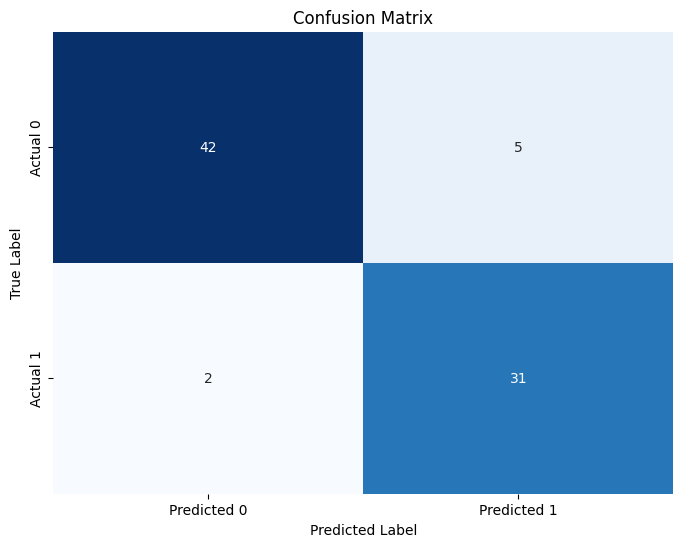

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()